In [55]:
import os
import warnings
warnings.filterwarnings('ignore')

In [56]:
import pandas as pd
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)

df_2018 = pd.read_csv("./hackathonGBDI_finalised/is-2018.csv", encoding= 'unicode_escape')
df_2019 = pd.read_csv("./hackathonGBDI_finalised/is-2019.csv", encoding= 'unicode_escape')
df_2020 = pd.read_csv("./hackathonGBDI_finalised/is-2020.csv", encoding= 'unicode_escape')
df_2021 = pd.read_csv("./hackathonGBDI_finalised/is-2021.csv", encoding= 'unicode_escape')
province_data = pd.read_excel("./province_code.xlsx")

# data_df = pd.concat([df_2018, df_2019, df_2020, df_2021])
# df_2018.isnull().sum()
# data_df.info()

# df_2018.columns.difference(df_2019.columns)
# df_2019.columns.difference(df_2020.columns)
# df_2020.columns.difference(df_2021.columns)

In [57]:
def preprocessing_raw_data(data_df_list, concat=True):
    """
    Returns a concatenated dataframe if concat is set to True; else return cleaned dataframe based on # list of dataframes provided
    """
    def subset_clean_dates(data_df, date_columns=['adate', 'hdate']):
        for date_column in date_columns:
            subset_data_df = data_df.query(f"{date_column} != '0/0/0 00:00:00'").copy()
            print(f"For {date_column} data, diff rows between ori and new subset is {data_df.shape[0] - subset_data_df.shape[0]}")
#             data_df = data_df.query("hdate != '0/0/0 00:00:00'").copy()
        return subset_data_df
    new_dataframe_list = []
    i=0
    for dataframe in data_df_list:
        i += 1
        print(f"Processing number {i} dataset provided in dataframe list.")
        new_dataframe = pd.DataFrame()
        new_dataframe = subset_clean_dates(dataframe).copy()
        new_dataframe_list.append(new_dataframe)
    if concat:
        data_df = pd.concat(new_dataframe_list)
        return data_df
    else:
        return tuple(new_dataframe_list)
    
# df_2018_2, df_2019_2, df_2020_2, df_2021_2 = preprocessing_raw_data([df_2018, df_2019, df_2020, df_2021], False)
processed_data_df = preprocessing_raw_data([df_2018, df_2019, df_2020, df_2021], True)
# processed_data_df.query("hdate == '0/0/0 00:00:00'")

Processing number 1 dataset provided in dataframe list.
For adate data, diff rows between ori and new subset is 0
For hdate data, diff rows between ori and new subset is 0
Processing number 2 dataset provided in dataframe list.
For adate data, diff rows between ori and new subset is 0
For hdate data, diff rows between ori and new subset is 0
Processing number 3 dataset provided in dataframe list.
For adate data, diff rows between ori and new subset is 0
For hdate data, diff rows between ori and new subset is 3
Processing number 4 dataset provided in dataframe list.
For adate data, diff rows between ori and new subset is 0
For hdate data, diff rows between ori and new subset is 1


In [58]:
province_data['province_district_id'] = province_data['province_id']+province_data['district_id']
province_data['province_id'].nunique()
province_data['province_id'] = province_data['province_id'].astype(object)
province_data.info()
# len(province_data['province_district_id'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   province_id           7433 non-null   object
 1   name_th               7433 non-null   object
 2   name_en               7433 non-null   object
 3   district_id           7433 non-null   int64 
 4   name_th_x             7433 non-null   object
 5   name_en_x             7433 non-null   object
 6   sub_dist_id           7433 non-null   int64 
 7   name_th_y             7433 non-null   object
 8   name_en_y             7093 non-null   object
 9   province_district_id  7433 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 580.8+ KB


In [59]:
# accidents_data_df['province_id'].unique()[np.where(np.isin(accidents_data_df['province_id'].unique(),province_data['province_id'].unique()))]

In [60]:
# province_data['province_id'].unique().isin(processed_data_df['aplace'].unique())
processed_data_df.iloc[np.where(np.isin(processed_data_df['aplace'].unique(),province_data['province_id'].unique()))]

sex   age occu          adate          atime           hdate  \
87     1  29.0    1  1/1/2018 1:00  1/1/2018 1:00   1/1/2018 2:18   
88     1  18.0    8  1/1/2018 1:00  1/1/2018 1:00   1/1/2018 1:11   
89     1  15.0    5  1/1/2018 1:00  1/1/2018 1:00   1/1/2018 5:43   
90     1  17.0    6  1/1/2018 1:00  1/1/2018 1:00   1/1/2018 7:44   
91     1  18.0    8  1/1/2018 1:00  1/1/2018 1:00   1/1/2018 1:26   
..   ...   ...  ...            ...            ...             ...   
161    1  18.0    5  1/1/2018 2:00  1/1/2018 2:00   1/1/2018 2:18   
162    1  49.0    5  1/1/2018 2:00  1/1/2018 2:00  1/1/2018 15:41   
164    1  20.0   99  1/1/2018 2:00  1/1/2018 2:00   2/1/2018 9:43   
166    1  26.0   99  1/1/2018 2:00  1/1/2018 2:00   1/1/2018 6:18   
172    2  18.0    8  1/1/2018 2:09  1/1/2018 2:09   1/1/2018 2:30   

              htime aplace aampur atumbon  ... injt injfrom risk1 risk2 risk3  \
87    1/1/2018 2:18     30    1.0     1.0  ...    2       4     1     0   NaN   
88    1/1/2018 1:11     40   16.0    10.0  ...    2      21     1     N   NaN   
89    1/1/2018 5:43     30    2.0     7.0  ...    2      18     1     0   NaN   
90    1/1/2018 7:44     30    1.0    11.0  ...    2      12     0     0   NaN   
91    1/1/2018 1:26     40    1.0     1.0  ...    2      21     1     0   NaN   
..              ...    ...    ...     ...  ...  ...     ...   ...   ...   ...   
161   1/1/2018 2:18     90   11.0     1.0  ...    2      21     0     0   NaN   
162  1/1/2018 15:41     40    5.0     1.0  ...    2      21     0     0     0   
164   2/1/2018 9:43     40    6.0     1.0  ...    2      21     0   NaN   NaN   
166   1/1/2018 6:18     41   17.0    10.0  ...    2      21     1     0   NaN   
172   1/1/2018 2:30     90   11.0     1.0  ...    2       2     1     0   NaN   

    risk4 risk5 hprov           rdate mass_casualty  
87      1     0   NaN  0/0/0 00:00:00           0.0  
88      0     N   NaN  0/0/0 00:00:00           0.0  
89      0     0  30.0  11/1/2018 0:00           0.0  
90      1     0   NaN  0/0/0 00:00:00           0.0  
91      0     0   NaN             NaN           0.0  
..    ...   ...   ...             ...           ...  
161     0     0   NaN  0/0/0 00:00:00           0.0  
162     0   NaN   NaN  0/0/0 00:00:00           0.0  
164   NaN     0   NaN  0/0/0 00:00:00           0.0  
166     0     0  41.0   7/1/2018 0:00           0.0  
172     1     0   NaN  0/0/0 00:00:00           0.0  

[77 rows x 24 columns]

In [61]:
data_df = processed_data_df.rename(columns={'aplace': 'province_id'}).copy()

In [62]:
# pd.to_datetime(full_data_df['hdate'])
# date_time_str = '31/12/2019 23:50'
# date_time_obj = datetime.strptime(date_time_str, '%d/%m/%Y %H:%M')
# date_time_obj
for date_column in ['adate', 'hdate']:
    data_df[date_column] = pd.to_datetime(data_df[date_column], format='%d/%m/%Y %H:%M', errors = 'coerce')    
#     full_data_df[date_column] = full_data_df[date_column].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M'))

In [63]:
categorical_columns = ['sex', 'occu', 'injby', 'injoccu', 'injp', 'injt', 'injfrom', 'risk1', 
                       'risk2', 'risk3', 'risk4', 'risk5', 'mass_casualty']
for cat_col in categorical_columns:
    data_df[cat_col] = pd.to_numeric(data_df[cat_col], errors='coerce')
    data_df[cat_col] = data_df[cat_col].astype('Int64')
    data_df[cat_col] = data_df[cat_col].astype('category')
# data_df['risk1'].unique()

In [64]:
@interact
def update_df_length(cat_col=categorical_columns):
    plt.figure()
    data_df[cat_col].value_counts().plot(kind='bar')
    plt.title(f"{cat_col}")

interactive(children=(Dropdown(description='cat_col', options=('sex', 'occu', 'injby', 'injoccu', 'injp', 'inj…

In [65]:
# Subsetting only accidents for fruther analysis
accidents_data_df = data_df.query("injby==1")
accidents_data_df['Year_adate'] = accidents_data_df['adate'].dt.year
accidents_data_df['Month_adate'] = accidents_data_df['adate'].dt.month
accidents_data_df['Day_adate'] = accidents_data_df['adate'].dt.day

In [66]:
accidents_data_df_male = accidents_data_df.query("sex==1")
accidents_data_df_female = accidents_data_df.query("sex==2")

<AxesSubplot:xlabel='Year_Month', ylabel='hdate'>

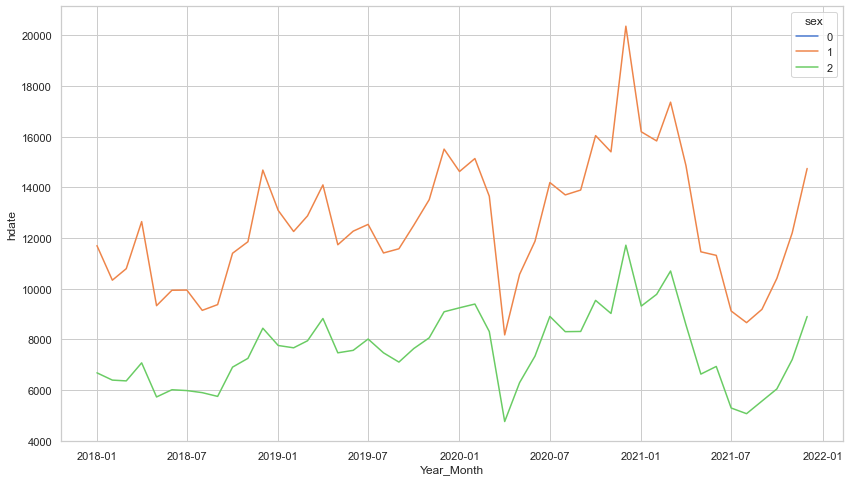

In [67]:
accidents_data_df_sex = accidents_data_df.groupby(['Year_adate', 'Month_adate', 'sex'])[['hdate']].count().reset_index()
accidents_data_df_sex['Year_Month'] = pd.to_datetime(accidents_data_df_sex["Year_adate"].astype(str) + "/" + accidents_data_df_sex["Month_adate"].astype(str))
accidents_data_df_sex = accidents_data_df_sex.query("sex != 0")
sns.lineplot('Year_Month', 'hdate', hue='sex', data=accidents_data_df_sex)

In [68]:
# accidents_data_df_male.groupby(['Year_adate', 'Month_adate']).apply(lambda x: x.shape[0]).plot()
# accidents_data_df_female.groupby(['Year_adate', 'Month_adate']).apply(lambda x: x.shape[0]).plot(color='red')

In [69]:
accidents_data_df['province_id'] = pd.to_numeric(accidents_data_df['province_id'], errors='coerce')
accidents_data_df['province_id'] = accidents_data_df['province_id'].astype('Int64')
# accidents_data_df['province_id'] = accidents_data_df['province_id'].astype('category')

province_data['province_id'] = pd.to_numeric(province_data['province_id'], errors='coerce')
province_data['province_id'] = province_data['province_id'].astype('Int64')
# province_data['province_id'] = province_data['province_id'].astype('category')
province_data_main = province_data[['province_id', 'name_th', 'name_en']].drop_duplicates()

accidents_data_df['Year_Month'] = pd.to_datetime(accidents_data_df["Year_adate"].astype(str) + "/" + accidents_data_df["Month_adate"].astype(str))

In [70]:
# Subsetting accidents_data_df whose province_id can be found in province_data
accidents_data_df_has_province = accidents_data_df[accidents_data_df['province_id'].isin(province_data_main['province_id'].unique())]

In [71]:
# Merging of accidents_data_df with province_data to get their province names in thai and english
accidents_data_df_has_province_merged = pd.merge(accidents_data_df_has_province, province_data_main, on='province_id')
sorted_accidents_data_df_has_province_merged = accidents_data_df_has_province_merged.groupby(['Year_adate', 'name_en'])[['hdate']].count().reset_index().sort_values(ascending=False, by=['Year_adate','hdate'])

In [72]:
def get_yearly_top_accidents_by_province(data_df, year=2021, top=5):
    if year == 'all':
        subset_df = data_df.groupby(['Year_adate']).head(top)
        return subset_df
    else:
        year = int(year)
        subset_df = sorted_accidents_data_df_has_province_merged.query(f"Year_adate == {year}").head(top)
    return subset_df
get_yearly_top_accidents_by_province(sorted_accidents_data_df_has_province_merged, 'all', 5)

Year_adate     name_en  hdate
247        2021   Khon Kaen  17827
241        2021  Chiang Rai  14199
303        2021  Udon Thani  12865
240        2021  Chiang Mai   8469
298        2021       Surin   8232
170        2020   Khon Kaen  21103
163        2020  Chiang Mai  17013
164        2020  Chiang Rai  16355
221        2020       Surin   9627
217        2020    Songkhla   8191
93         2019   Khon Kaen  17592
86         2019  Chiang Mai  17164
87         2019  Chiang Rai  16798
140        2019    Songkhla  11431
144        2019       Surin   9022
16         2018   Khon Kaen  17757
10         2018  Chiang Rai  12369
9          2018  Chiang Mai  10694
63         2018    Songkhla   9980
18         2018     Lampang   7797

In [73]:
accidents_data_df_has_province_merged_gb = accidents_data_df_has_province_merged.groupby(['Year_Month', 'name_en'])[['hdate']].count().reset_index()
sns.lineplot('Year_Month', 'hdate', hue='name_en', data=accidents_data_df_has_province_merged_gb)

<AxesSubplot:xlabel='Year_Month', ylabel='hdate'>

<AxesSubplot:xlabel='Year_Month', ylabel='hdate'>

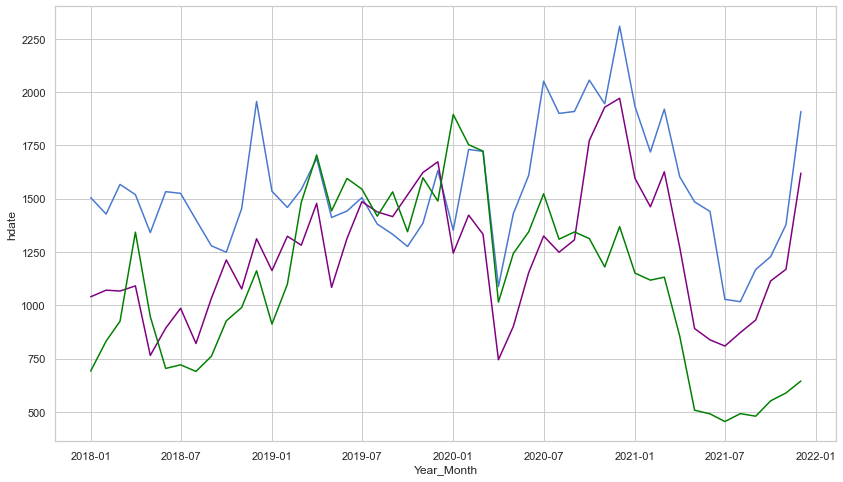

In [74]:
KhonKaen_monthly_df = accidents_data_df_has_province_merged.query("name_en == 'Khon Kaen'").groupby(['Year_adate', 'Month_adate'])[['hdate']].count().reset_index()
KhonKaen_monthly_df['Year_Month'] = pd.to_datetime(KhonKaen_monthly_df["Year_adate"].astype(str) + "/" + KhonKaen_monthly_df["Month_adate"].astype(str))
sns.lineplot('Year_Month', 'hdate', data=KhonKaen_monthly_df)

ChiangRai_monthly_df = accidents_data_df_has_province_merged.query("name_en == 'Chiang Rai'").groupby(['Year_adate', 'Month_adate'])[['hdate']].count().reset_index()
ChiangRai_monthly_df['Year_Month'] = pd.to_datetime(ChiangRai_monthly_df["Year_adate"].astype(str) + "/" + ChiangRai_monthly_df["Month_adate"].astype(str))
sns.lineplot('Year_Month', 'hdate', data=ChiangRai_monthly_df, color='Purple')

ChiangMai_monthly_df = accidents_data_df_has_province_merged.query("name_en == 'Chiang Mai'").groupby(['Year_adate', 'Month_adate'])[['hdate']].count().reset_index()
ChiangMai_monthly_df['Year_Month'] = pd.to_datetime(ChiangMai_monthly_df["Year_adate"].astype(str) + "/" + ChiangMai_monthly_df["Month_adate"].astype(str))
sns.lineplot('Year_Month', 'hdate', data=ChiangMai_monthly_df, color='Green')

In [75]:
# Processed to get week of the month
def get_week_of_month(day_of_month):
    week_of_month_dict = {1: range(1, 8), 2: range(8, 15), 3: range(15, 22), 4: range(22, 29), 5: range(29, 32)}
    for key, item in week_of_month_dict.items():
        if day_of_month in item:
            return key

In [76]:
accidents_data_df_has_province_merged['Week_adate'] = accidents_data_df_has_province_merged['Day_adate'].apply(lambda x: get_week_of_month(x))

In [77]:
# KhonKaen_daily_df.set_index('Year_Month_Day').resample('M').sum()

<AxesSubplot:xlabel='Year_Month_Day', ylabel='hdate'>

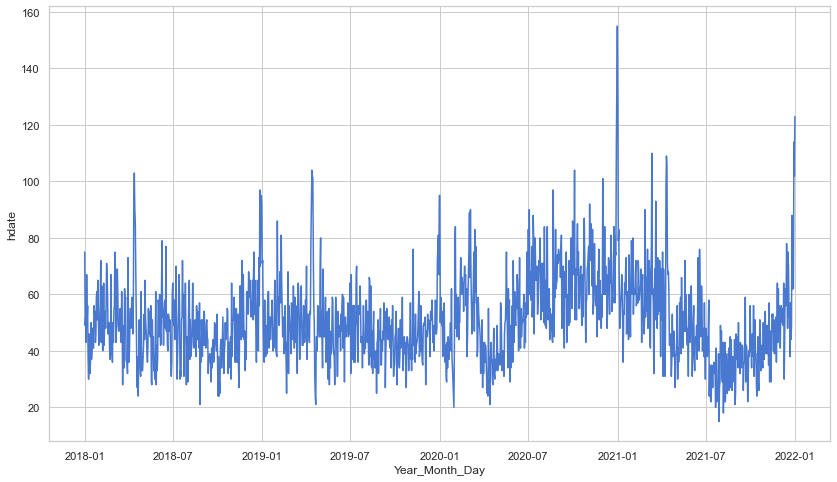

In [78]:
KhonKaen_daily_df = accidents_data_df_has_province_merged.query("name_en == 'Khon Kaen'").groupby(['Year_adate', 'Month_adate', 'Day_adate'])[['hdate']].count().reset_index()
KhonKaen_daily_df['Year_Month_Day'] = pd.to_datetime(KhonKaen_daily_df["Year_adate"].astype(str) + "/" + KhonKaen_daily_df["Month_adate"].astype(str) + "/" + KhonKaen_daily_df["Day_adate"].astype(str))
sns.lineplot('Year_Month_Day', 'hdate', data=KhonKaen_daily_df)

In [79]:
# daily_date_range = KhonKaen_daily_df['Year_Month_Day'].max() - KhonKaen_daily_df['Year_Month_Day'].min()
new_date_index = pd.date_range(KhonKaen_daily_df['Year_Month_Day'].min(), KhonKaen_daily_df['Year_Month_Day'].max())
KhonKaen_daily_df = KhonKaen_daily_df.set_index('Year_Month_Day')
KhonKaen_daily_df = KhonKaen_daily_df.reindex(new_date_index, fill_value=np.nan)

KhonKaen_daily_df = KhonKaen_daily_df.reset_index().rename(columns={'index':'Year_Month_Day'})
KhonKaen_daily_df['Week_adate'] = KhonKaen_daily_df['Day_adate'].apply(lambda x: get_week_of_month(x))

<AxesSubplot:xlabel='Year_Month_Week', ylabel='hdate'>

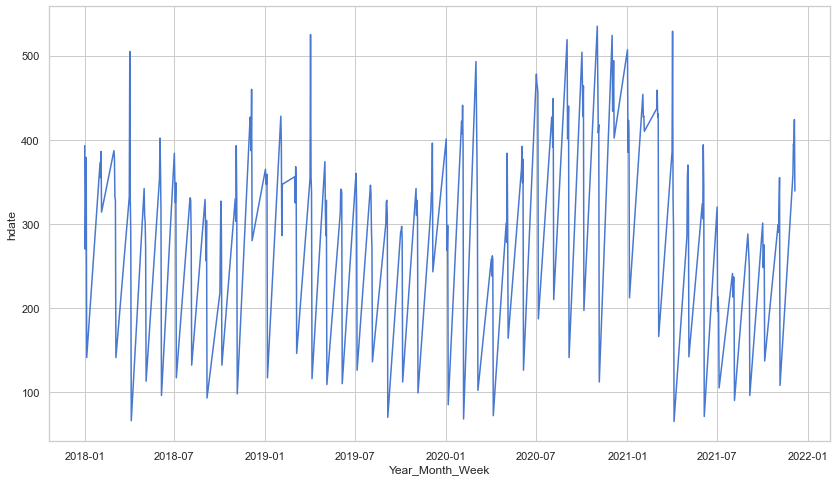

In [80]:
KhonKaen_weekly_df = accidents_data_df_has_province_merged.query("name_en == 'Khon Kaen'").groupby(['Year_adate', 'Month_adate', 'Week_adate'])[['hdate']].count().reset_index()
KhonKaen_weekly_df['Year_Month_Week'] = pd.to_datetime(KhonKaen_weekly_df["Year_adate"].astype(str) + "/" + KhonKaen_weekly_df["Month_adate"].astype(str) + "/" + KhonKaen_weekly_df["Week_adate"].astype(str))

# new_weekly_date_index = pd.date_range(KhonKaen_weekly_df['Year_Month_Week'].min(), KhonKaen_weekly_df['Year_Month_Week'].max(), freq='W')
# KhonKaen_weekly_df = KhonKaen_weekly_df.set_index('Year_Month_Week')
# KhonKaen_weekly_df = KhonKaen_weekly_df.reindex(new_weekly_date_index, fill_value=np.nan)
sns.lineplot('Year_Month_Week', 'hdate', data=KhonKaen_weekly_df)

## Dashboard

In [81]:
# Weekly, Daily or Monthly data
@interact
def view_accidents_trending(province=list(accidents_data_df_has_province_merged['name_en'].unique()), data_freq=['Daily','Weekly', 'Monthly']):
    if data_freq == 'Daily':
        daily_df = accidents_data_df_has_province_merged.query(f"name_en == '{province}'").groupby(['Year_adate', 'Month_adate', 'Day_adate'])[['hdate']].count().reset_index()
        daily_df['Year_Month_Day'] = pd.to_datetime(daily_df["Year_adate"].astype(str) + "/" + daily_df["Month_adate"].astype(str) + "/" + daily_df["Day_adate"].astype(str))
        sns.lineplot('Year_Month_Day', 'hdate', data=daily_df).set(title=f'Daily Accident Trending for {province}')
#         fig = px.line(x = daily_df['Year_Month_Day'] , y = daily_df['hdate'], title = f'Daily Accident Trending for {province}')
#         fig.show()
    elif data_freq == 'Weekly':     
        weekly_df = accidents_data_df_has_province_merged.query(f"name_en == '{province}'").groupby(['Year_adate', 'Month_adate', 'Week_adate'])[['hdate']].count().reset_index()
        weekly_df['Year_Month_Week'] = pd.to_datetime(weekly_df["Year_adate"].astype(str) + "/" + weekly_df["Month_adate"].astype(str) + "/" + weekly_df["Week_adate"].astype(str))
        sns.lineplot('Year_Month_Week', 'hdate', data=weekly_df).set(title=f'Weekly Accident Trending for {province}')
    elif data_freq == 'Monthly':
        monthly_df = accidents_data_df_has_province_merged.query(f"name_en == '{province}'").groupby(['Year_adate', 'Month_adate'])[['hdate']].count().reset_index()
        monthly_df['Year_Month'] = pd.to_datetime(monthly_df["Year_adate"].astype(str) + "/" + monthly_df["Month_adate"].astype(str))
        sns.lineplot('Year_Month', 'hdate', data=monthly_df).set(title=f'Monthly Accident Trending for {province}')

interactive(children=(Dropdown(description='province', options=('Chanthaburi', 'Phetchaburi', 'Mukdahan', 'Mah…

## Modeling 

In [82]:
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [83]:
modeling_dataset = KhonKaen_weekly_df.copy()

In [84]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [85]:
plotExponentialSmoothing(modeling_dataset.hdate, [0.6, 0.05])

NameError: name 'plotExponentialSmoothing' is not defined

In [86]:
def double_exponential_smoothing(series, alpha, beta):
    """
        series - dataset with timeseries
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters for level
        betas - list of floats, smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

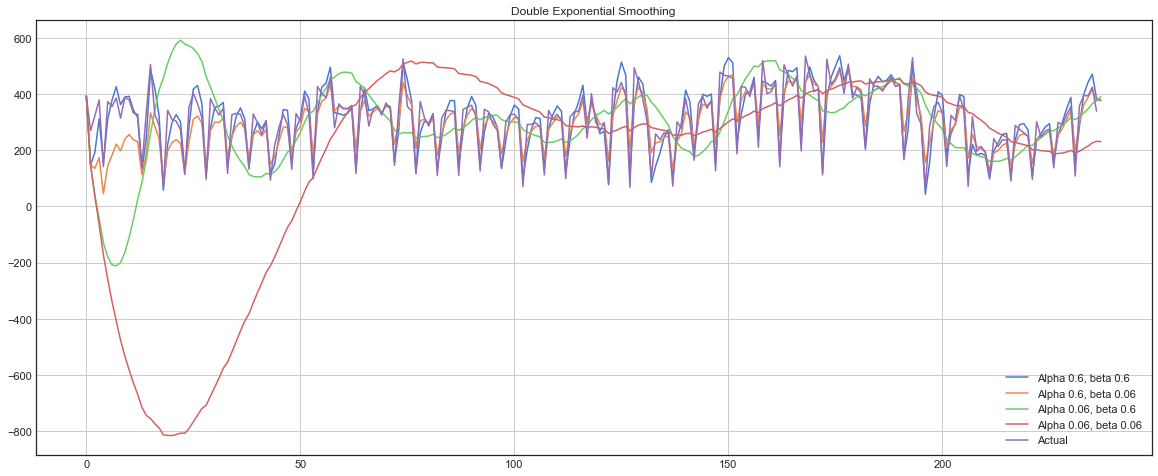

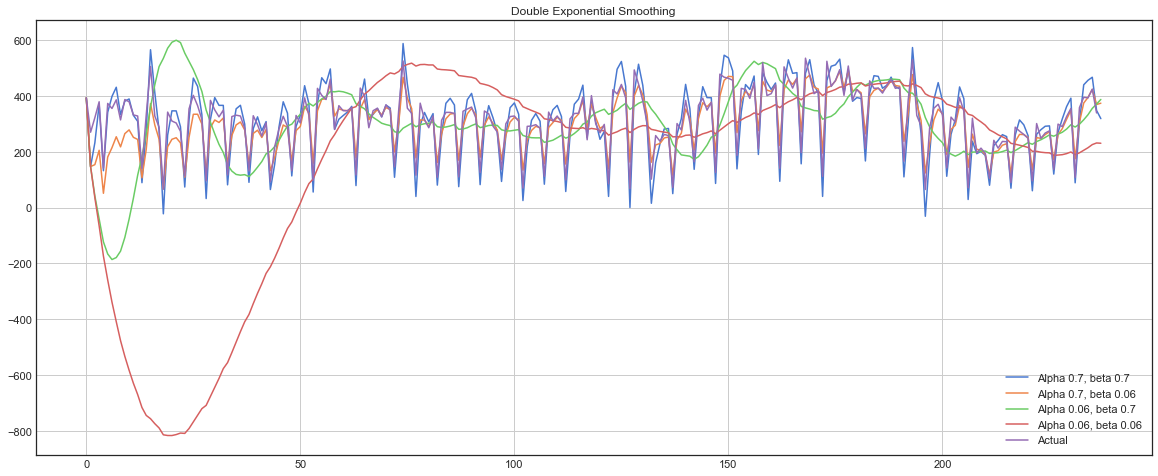

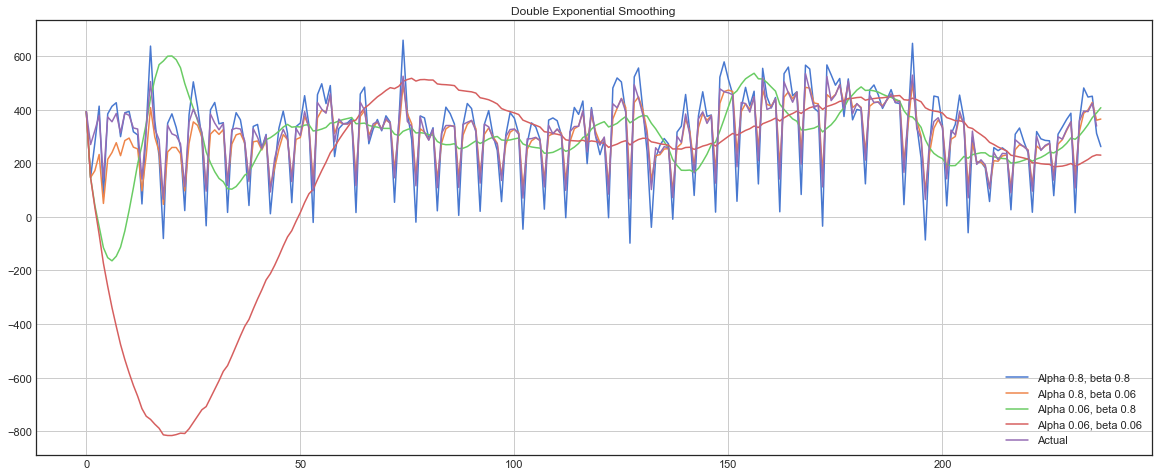

In [87]:
for alpha in [0.6, 0.7, 0.8, 0.9]:
    plotDoubleExponentialSmoothing(modeling_dataset.hdate, alphas=[alpha, 0.06], betas=[alpha, 0.06])

In [88]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [89]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=5):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    nsplits = 3
    tscv = TimeSeriesSplit(n_splits=nsplits) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):
        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error) 
    return np.mean(np.array(errors))

In [90]:
def plotHoltWinters(model, series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_squared_error(series.values, model.result[:len(series)])
    plt.title("Mean Squared Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=2, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-16, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

In [91]:
%%time
data = modeling_dataset.hdate[:-16] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

def optimizing_holt_with_plot(data, min_methods=['TNC']):
    for method in min_methods:
        print(method)
        # Minimizing the loss function 
        opt = minimize(timeseriesCVscore, x0=x, 
                       args=(data, mean_squared_error), 
                       method=method, bounds = ((0, 1), (0, 1), (0, 1))
                      )

        # Take optimal values...
        alpha_final, beta_final, gamma_final = opt.x
        print(alpha_final, beta_final, gamma_final)

        # ...and train the model with them, forecasting for the next 5 years (monthly)
        model = HoltWinters(data, slen = 5, 
                            alpha = alpha_final, 
                            beta = beta_final, 
                            gamma = gamma_final, 
                            n_preds = 60, scaling_factor = 2)
        model.triple_exponential_smoothing()

        plotHoltWinters(model, modeling_dataset.hdate, plot_intervals=True, plot_anomalies=True)

Wall time: 0 ns


TNC
0.058840974508837296 0.031735008010263466 0.009278819848650699
Nelder-Mead
0.059264145453780295 0.031544163445833925 0.007402732436209902
Powell
0.12979143513624739 0.7254812394525223 6.486948569245565e-05
CG
0.05925932195433445 0.031545262044853244 0.0074075215549462906
SLSQP
0.0 0.0 0.0
BFGS
0.05925933172499782 0.0315452559195697 0.007407515754856822
L-BFGS-B
0.05925933398470834 0.03154525436690733 0.007407510590620285


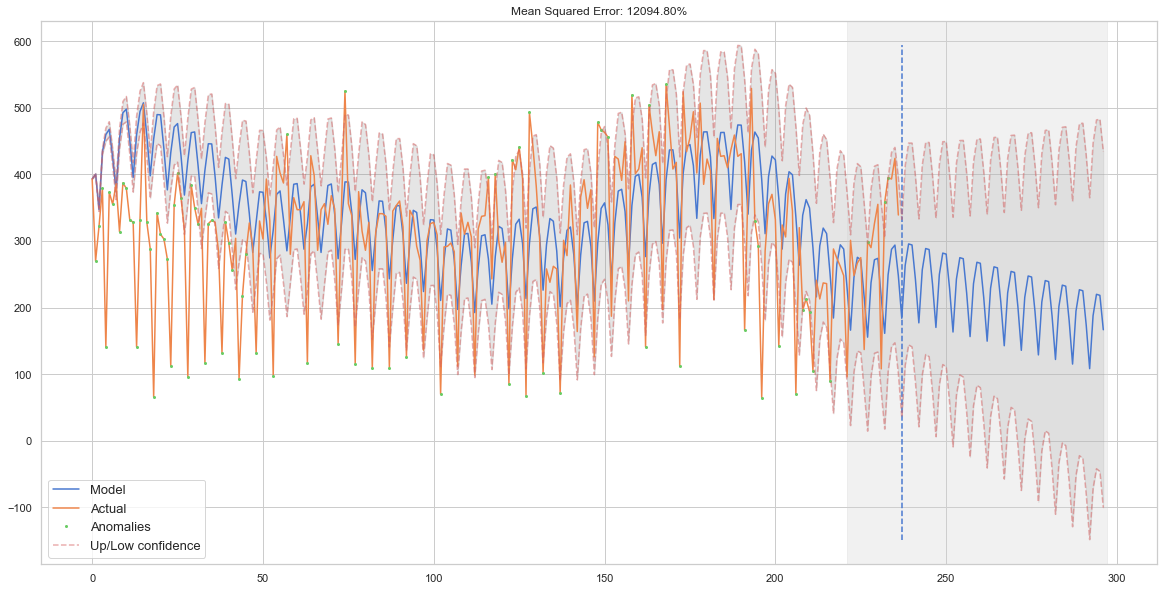

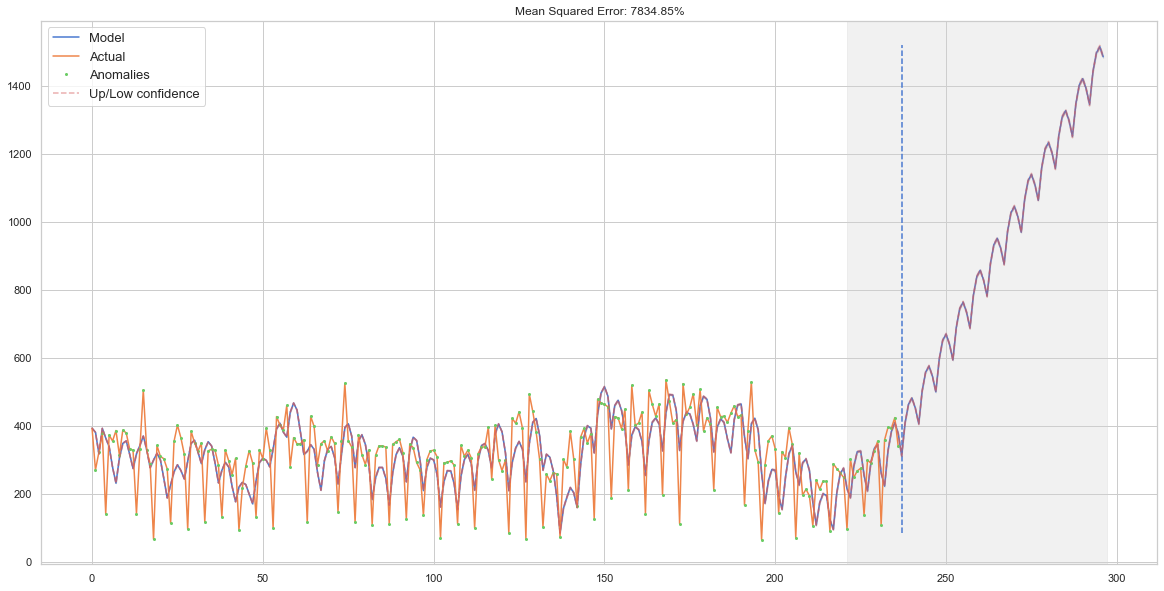

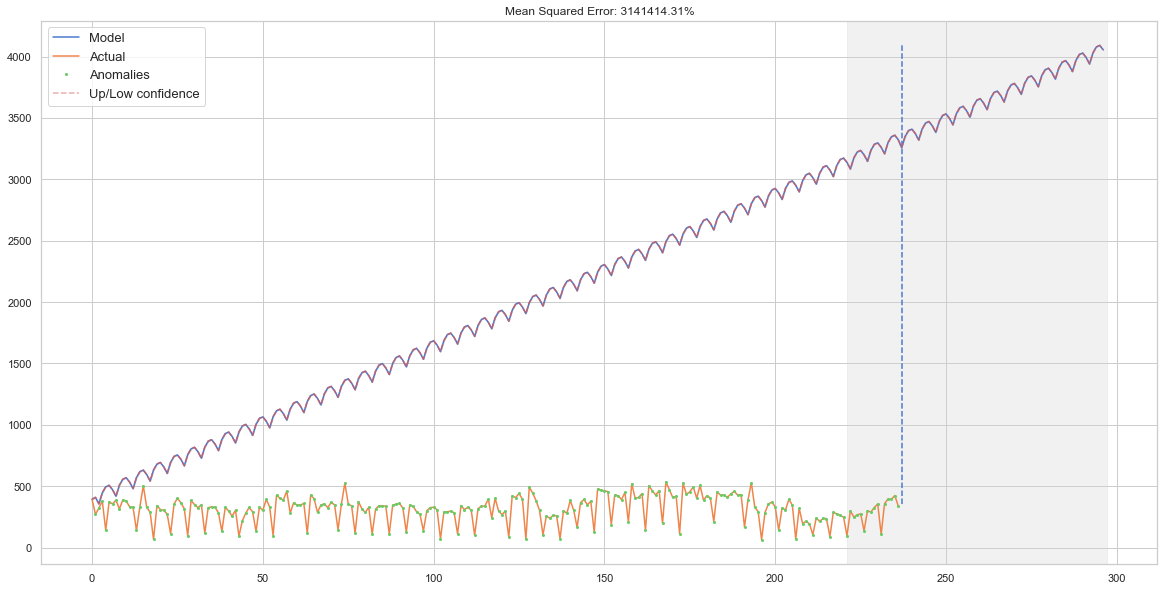

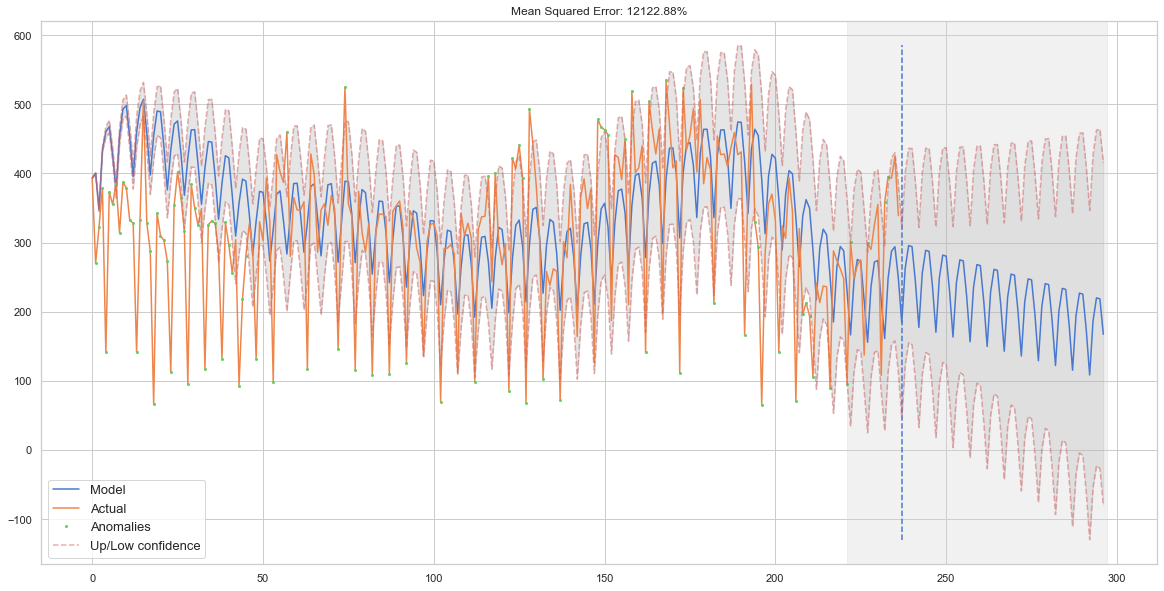

In [92]:
optimizing_holt_with_plot(modeling_dataset.hdate, ['TNC', 'Nelder-Mead', 'Powell', 'CG', 'SLSQP', 'BFGS', 'L-BFGS-B'])

In [93]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(modeling_dataset.hdate, lags=20)

In [96]:
modeling_dataset_diff = modeling_dataset.hdate - modeling_dataset.hdate.shift(5)
tsplot(modeling_dataset_diff[5:], lags=30)

In [97]:
def optimizeSARIMA(data_df, parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(data_df, order=(param[0], d, param[1]),
                                            seasonal_order=(param[2], D, param[3], s))
            model = model.fit(disp=-1)#, maxiter=200, method='nm')
        except:
            continue
        aic = model.aic
        print(aic)
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    print(result_table)
    result_table.columns = ['parameters', 'aic']
    # sortieng in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [98]:
# setting initial values and some bounds for them
ps = range(1, 5)
d=1 
qs = range(1, 2)
Ps = range(1, 2)
D=1
Qs = range(1, 5)
s = 5 # season length is still 5

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)
parameters_list

[(1, 1, 1, 1),
 (1, 1, 1, 2),
 (1, 1, 1, 3),
 (1, 1, 1, 4),
 (2, 1, 1, 1),
 (2, 1, 1, 2),
 (2, 1, 1, 3),
 (2, 1, 1, 4),
 (3, 1, 1, 1),
 (3, 1, 1, 2),
 (3, 1, 1, 3),
 (3, 1, 1, 4),
 (4, 1, 1, 1),
 (4, 1, 1, 2),
 (4, 1, 1, 3),
 (4, 1, 1, 4)]

In [101]:
# result_table = optimizeSARIMA(modeling_dataset.hdate, parameters_list, d, D, s)
# result_table.head()
# p, q, P, Q = result_table.parameters[0]

# best_model=sm.tsa.statespace.SARIMAX(modeling_dataset.hdate, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
# print(best_model.summary())

In [102]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

In [103]:
# plotSARIMA(ads, best_model, 50)

## Regression

In [104]:
KhonKaen_daily_df['Week'] = KhonKaen_daily_df['Year_Month_Day'].dt.weekday
KhonKaen_daily_df['Is_Weekend'] = KhonKaen_daily_df.Week.isin([5,6])*1

In [105]:
for i in range(6, 15):
    KhonKaen_daily_df["lag_{}".format(i)] = KhonKaen_daily_df.hdate.shift(i)

In [106]:
data_regression = KhonKaen_daily_df.copy()
data_regression = data_regression.drop(['Year_Month_Day', 'Year_adate', 'Month_adate', 'Day_adate'], axis=1)
input_features = []#['Week', 'Is_Weekend', 'lag_13', 'lag_12']
target_variable = ['hdate']
if input_features:
    data_regression = data_regression[input_features+target_variable]

In [107]:
# Creating a copy of the initial datagrame to make various transformations 
# data_regression = pd.DataFrame(KhonKaen_daily_df.hdate.copy())
# data_regression.columns = ["y"]

In [108]:
# Adding the lag of the target variable from 6 steps back up to 24
# for i in range(6, 15):
#     data_regression["lag_{}".format(i)] = data_regression.y.shift(i)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [110]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [111]:
y = data_regression.dropna().hdate
X = data_regression.dropna().drop(['hdate'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [112]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [113]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_squared_error(prediction, y_test)
    plt.title("Mean squared error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = data_regression.dropna().hdate
X = data_regression.dropna().drop(['hdate'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

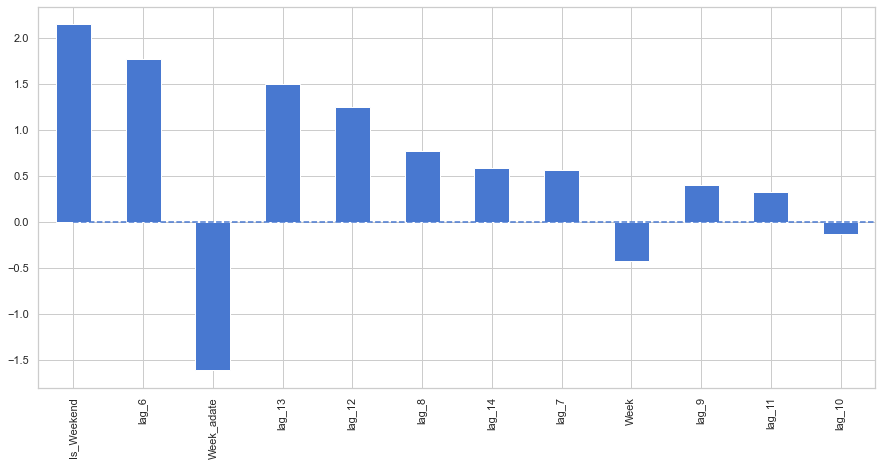

In [115]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

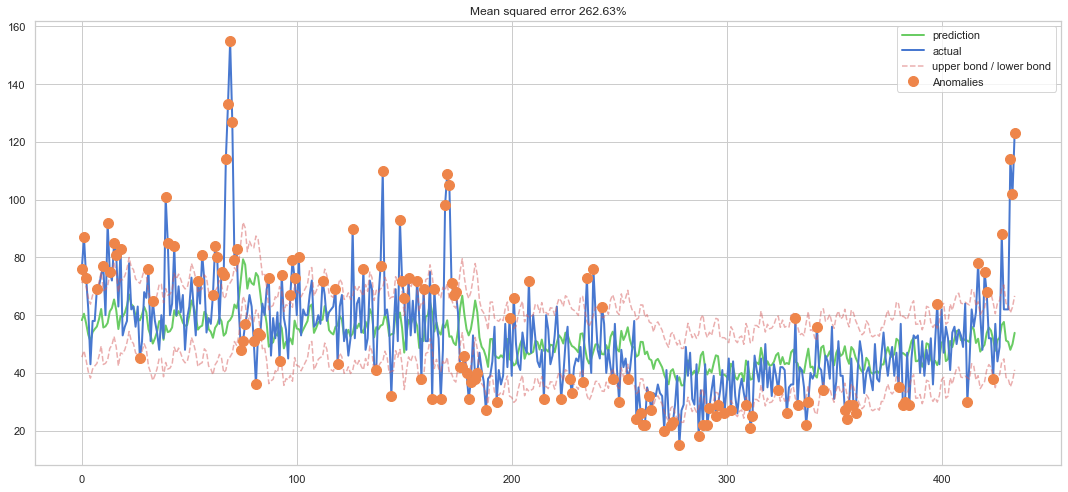

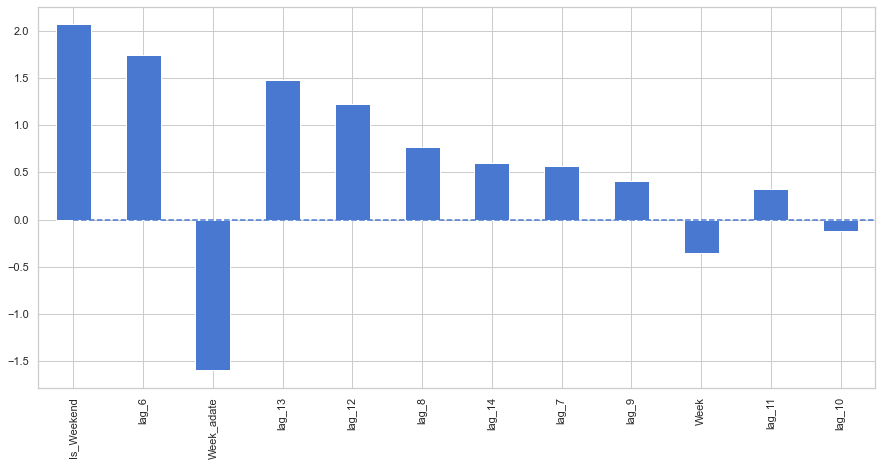

In [116]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

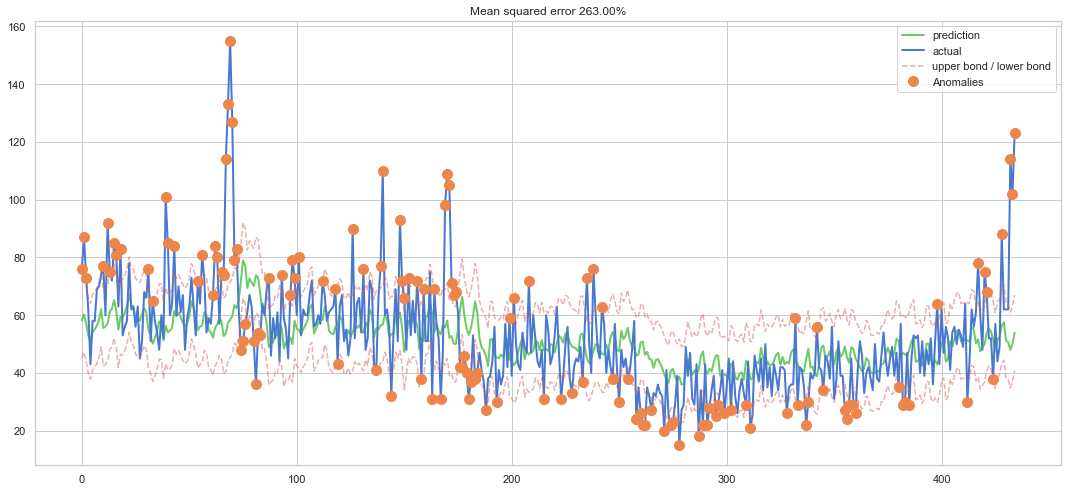

In [117]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

In [118]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

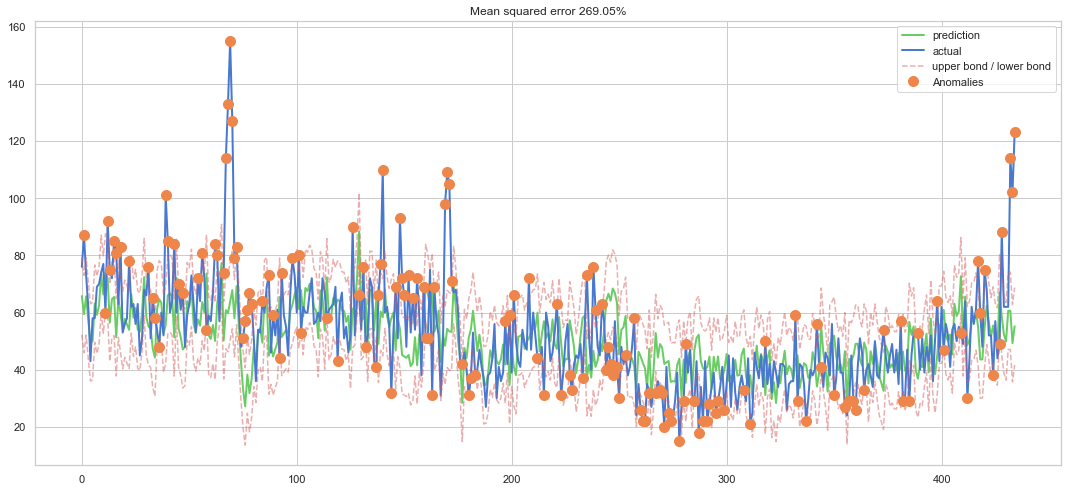

In [119]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)